Goals:
- Predict house prices accurately

- Understand what drives prices

- Identify overpriced vs underpriced neighborhoods

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Boston Housing dataset from CSV
df = pd.read_csv('https://gist.githubusercontent.com/nnbphuong/def91b5553736764e8e08f6255390f37/raw/373a856a3c9c1119e34b344de9230ae2ea89569d/BostonHousing.csv')

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Drop 'cat. medv' if exists (categorical version not needed)
if 'cat. medv' in df.columns:
    df = df.drop('cat. medv', axis=1)

display(df)
display(f"\nColumns: {df.columns.tolist()}")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


"\nColumns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']"

## Data Info/Understanding:
The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

## Data Preprocessing

In [137]:
# Data Preprocessing 
# Shape of the dataset
print(f"\n Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Data types
print("\n Data Types:")
print(df.dtypes)

# Basic statistics
print("\n Statistical Summary:")
display(df.describe().round(2))


 Dataset Shape: 506 rows, 13 columns

 Data Types:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

 Statistical Summary:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


In [138]:
# Check for Missing Values
display(df.isna().sum())
miss_value_pertentage = (df.isna().sum() / len(df)) * 100

# missing_df = pd.DataFrame({
#     'Missing Values': miss_value_pertentage,
#     'Percentage (%)': miss_value_pertentage
# })

display(miss_value_pertentage)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
lstat      0.0
medv       0.0
dtype: float64

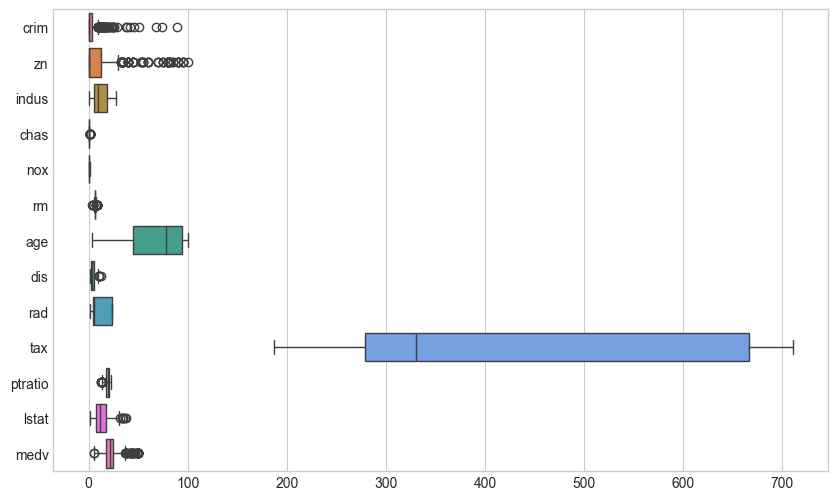

In [139]:
#boplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include="number"), orient="h")
plt.show()


- for this project, checking numeric columns:



In [140]:
#IQR
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

  
    print(f"\nColumn: {col}")
    print(f"IQR: {IQR}")
    print(f"Lower limit: {lower}")
    print(f"Upper limit: {upper}")





Column: crim
IQR: 3.5950375
Lower limit: -5.31051125
Upper limit: 9.06963875

Column: zn
IQR: 12.5
Lower limit: -18.75
Upper limit: 31.25

Column: indus
IQR: 12.91
Lower limit: -14.175
Upper limit: 37.465

Column: chas
IQR: 0.0
Lower limit: 0.0
Upper limit: 0.0

Column: nox
IQR: 0.175
Lower limit: 0.18650000000000005
Upper limit: 0.8865

Column: rm
IQR: 0.7380000000000004
Lower limit: 4.778499999999999
Upper limit: 7.730500000000001

Column: age
IQR: 49.04999999999999
Lower limit: -28.54999999999999
Upper limit: 167.64999999999998

Column: dis
IQR: 3.0882500000000004
Lower limit: -2.5322000000000005
Upper limit: 9.820800000000002

Column: rad
IQR: 20.0
Lower limit: -26.0
Upper limit: 54.0

Column: tax
IQR: 387.0
Lower limit: -301.5
Upper limit: 1246.5

Column: ptratio
IQR: 2.8000000000000007
Lower limit: 13.199999999999998
Upper limit: 24.4

Column: lstat
IQR: 10.005000000000003
Lower limit: -8.057500000000005
Upper limit: 31.962500000000006

Column: medv
IQR: 7.975000000000001
Lower 

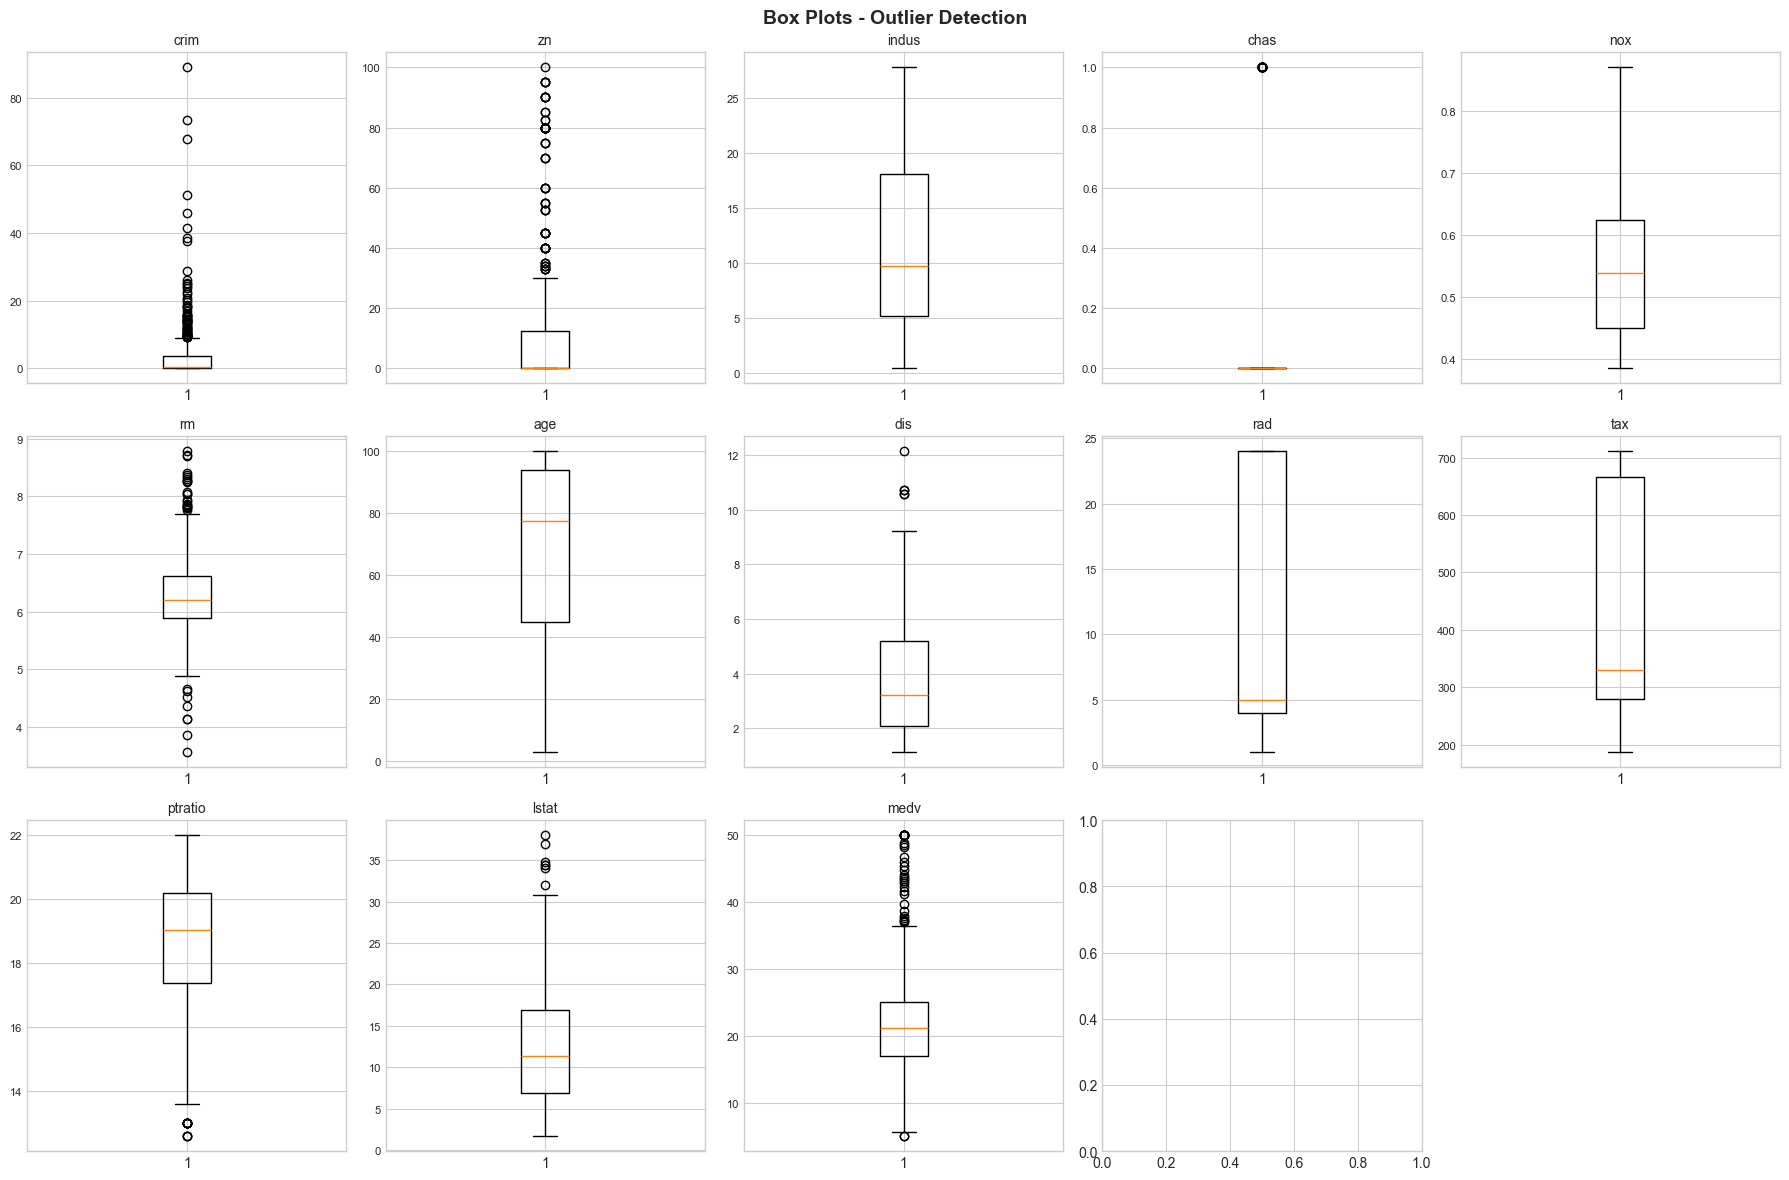

In [141]:
# Visualize Outliers with Box Plots
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(col, fontsize=10)
    axes[idx].tick_params(axis='y', labelsize=8)

# Hide the last empty subplot
axes[-1].axis('off')

plt.suptitle('Box Plots - Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

TARGET VARIABLE ANALYSIS (MEDV)


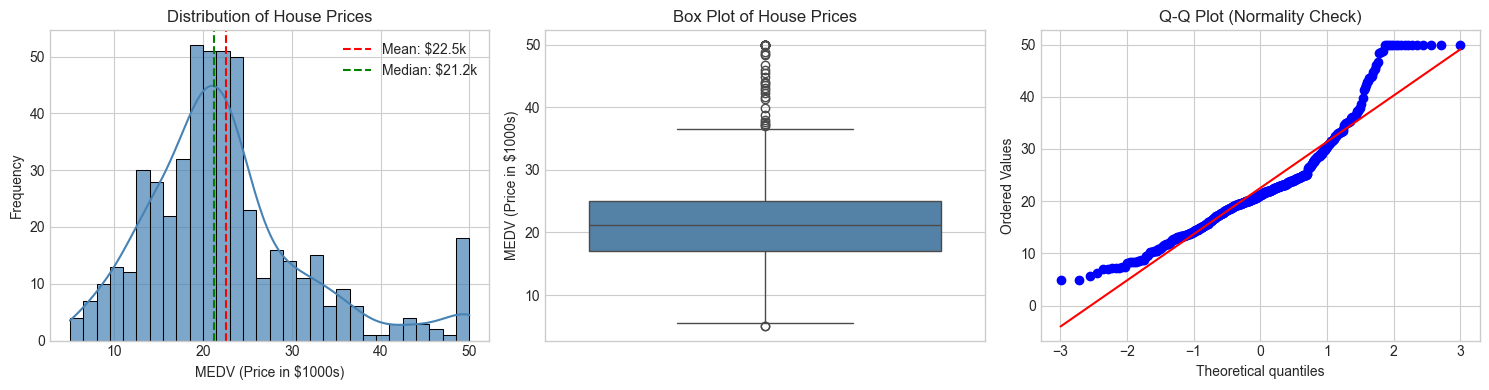


 Skewness: 1.108
 Kurtosis: 1.495
   → Positive skew indicates right-tailed distribution


In [142]:
# Target Variable Analysis (MEDV - House Prices)
print("="*50)
print("TARGET VARIABLE ANALYSIS (MEDV)")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution using seaborn
sns.histplot(df['medv'], bins=30, kde=True, color='steelblue', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].axvline(df['medv'].mean(), color='red', linestyle='--', label=f'Mean: ${df["medv"].mean():.1f}k')
axes[0].axvline(df['medv'].median(), color='green', linestyle='--', label=f'Median: ${df["medv"].median():.1f}k')
axes[0].set_xlabel('MEDV (Price in $1000s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices')
axes[0].legend()

# Box plot using seaborn
sns.boxplot(y=df['medv'], color='steelblue', ax=axes[1])
axes[1].set_ylabel('MEDV (Price in $1000s)')
axes[1].set_title('Box Plot of House Prices')

# QQ Plot for normality check
from scipy import stats
stats.probplot(df['medv'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

# Skewness
print(f"\n Skewness: {df['medv'].skew():.3f}")
print(f" Kurtosis: {df['medv'].kurtosis():.3f}")
print("   → Positive skew indicates right-tailed distribution")

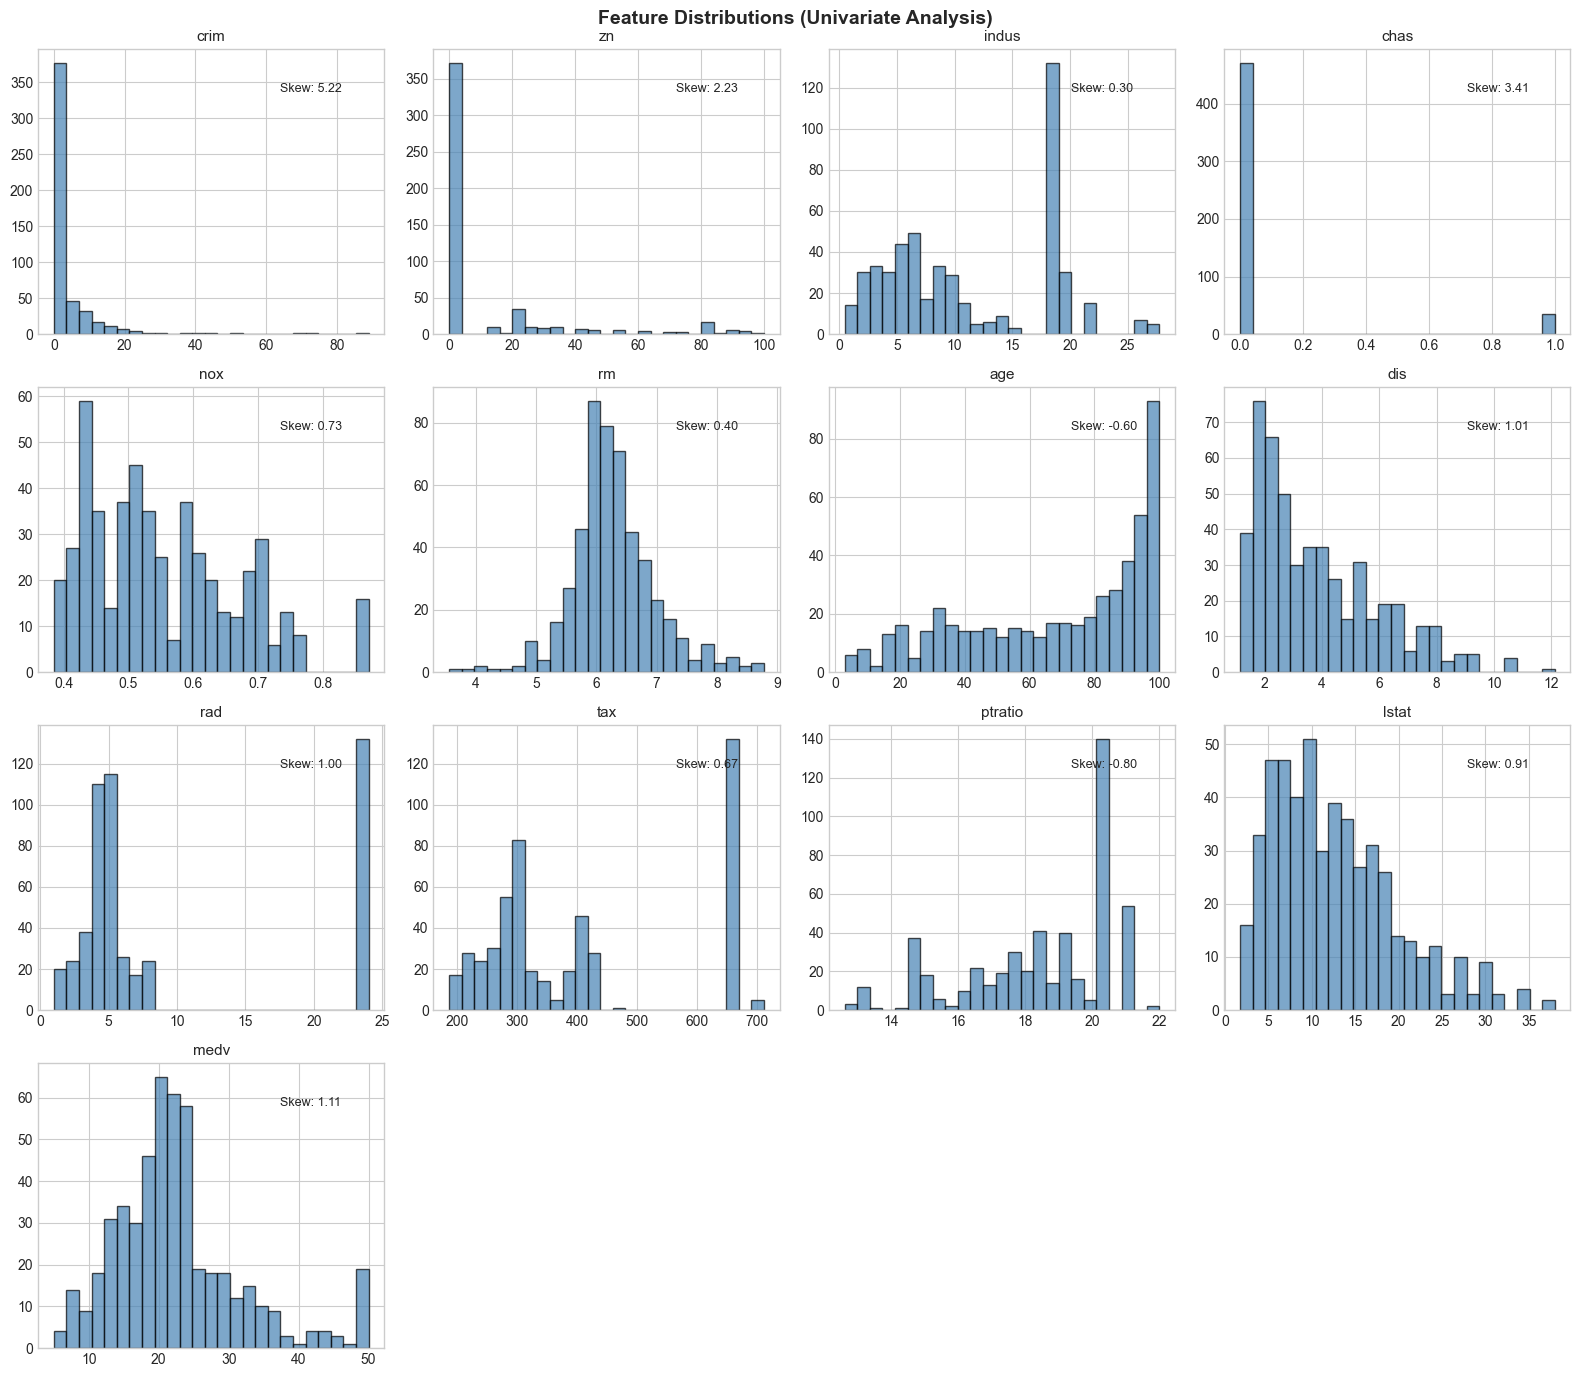

In [143]:
# Univariate Analysis - Distribution of All Features
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=25, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=11)
    axes[idx].set_xlabel('')
    skewness = df[col].skew()
    axes[idx].annotate(f'Skew: {skewness:.2f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=9)

# Hide empty subplots
for idx in range(len(df.columns), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Distributions (Univariate Analysis)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

CORRELATION ANALYSIS


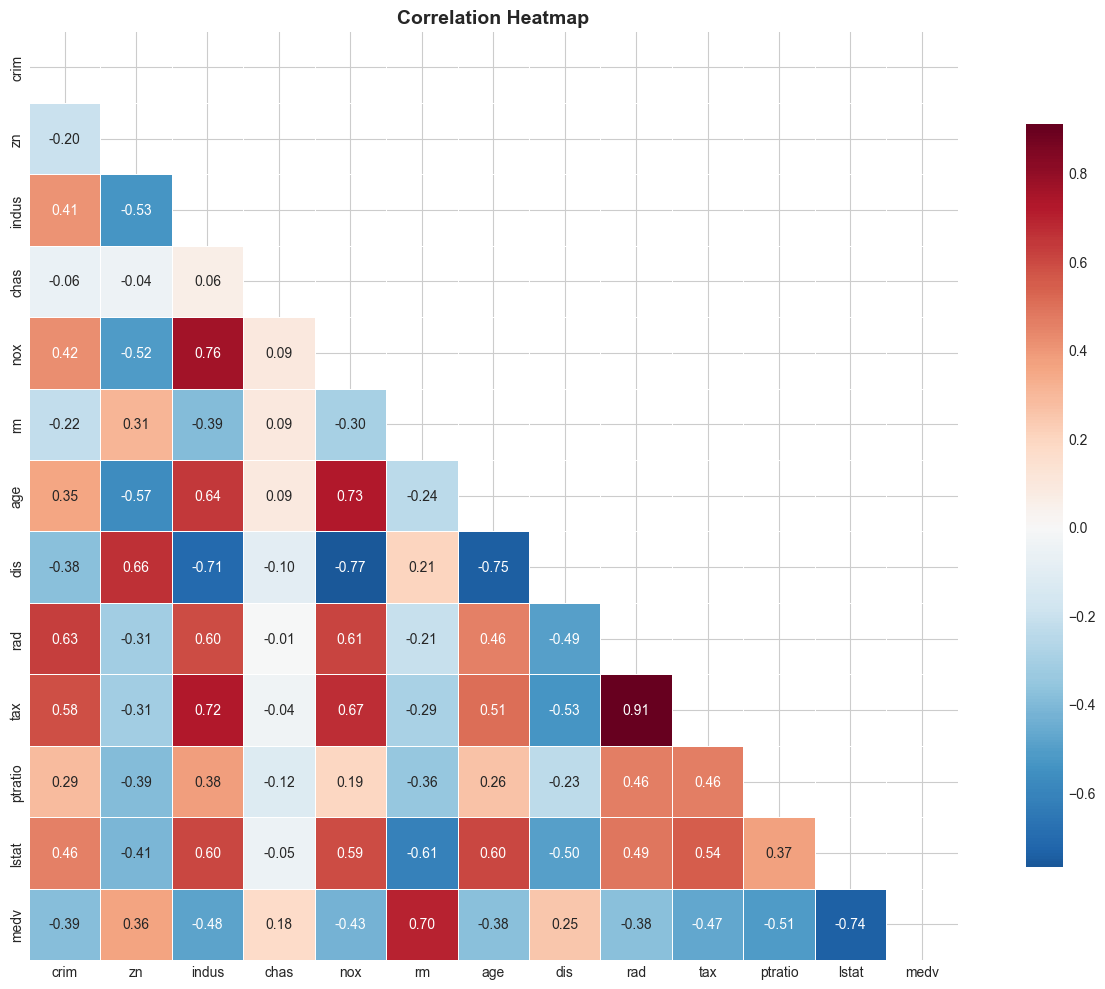


 Top Correlations with House Price (MEDV):
   lstat: -0.738 (⬇️ Negative)
   rm: 0.695 (⬆️ Positive)
   ptratio: -0.508 (⬇️ Negative)
   indus: -0.484 (⬇️ Negative)
   tax: -0.469 (⬇️ Negative)
   nox: -0.427 (⬇️ Negative)
   crim: -0.388 (⬇️ Negative)
   rad: -0.382 (⬇️ Negative)
   age: -0.377 (⬇️ Negative)
   zn: 0.360 (⬆️ Positive)
   dis: 0.250 (⬆️ Positive)
   chas: 0.175 (⬆️ Positive)


In [144]:
# Correlation Analysis
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with target variable
print("\n Top Correlations with House Price (MEDV):")
target_corr = correlation_matrix['medv'].drop('medv').sort_values(key=abs, ascending=False)
for feature, corr in target_corr.items():
    direction = "⬆️ Positive" if corr > 0 else "⬇️ Negative"
    print(f"   {feature}: {corr:.3f} ({direction})")

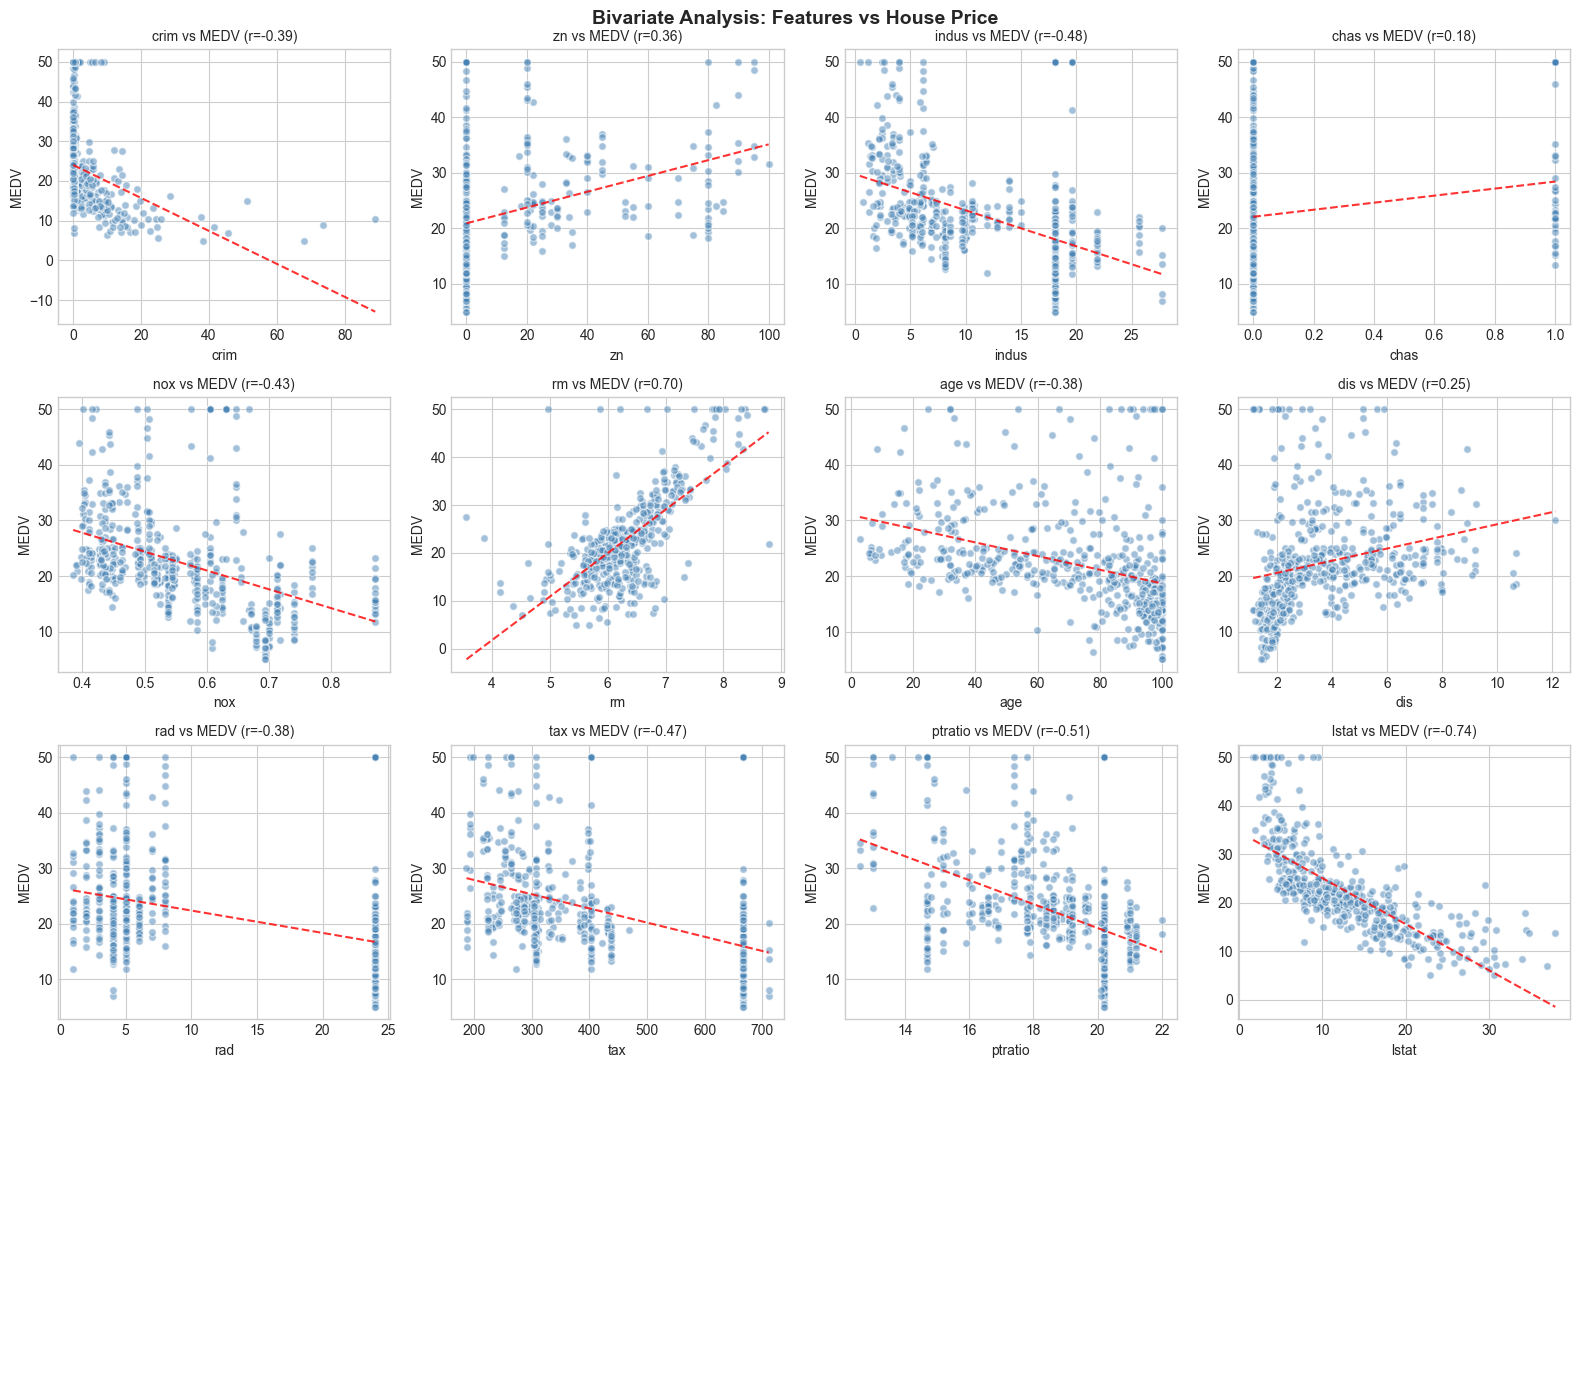

In [145]:
# Bivariate Analysis - Scatter Plots with Target Variable
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

features = [col for col in df.columns if col != 'medv']

for idx, col in enumerate(features):
    axes[idx].scatter(df[col], df['medv'], alpha=0.5, color='steelblue', edgecolor='white', s=30)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('MEDV')
    
    # Add trend line
    z = np.polyfit(df[col], df['medv'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col].sort_values(), p(df[col].sort_values()), "r--", alpha=0.8)
    
    # Add correlation value
    corr = df[col].corr(df['medv'])
    axes[idx].set_title(f'{col} vs MEDV (r={corr:.2f})', fontsize=10)

# Hide empty subplots
for idx in range(len(features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Bivariate Analysis: Features vs House Price', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [146]:
# Key Insights from EDA - Top Price Drivers
print("="*50)
print("KEY INSIGHTS FROM EDA")
print("="*50)

# Analyze top positive and negative correlations
positive_drivers = target_corr[target_corr > 0].head(3)
negative_drivers = target_corr[target_corr < 0].head(3)

print("\n🏠 FACTORS THAT INCREASE HOUSE PRICES:")
for feature, corr in positive_drivers.items():
    print(f"   • {feature}: r = {corr:.3f}")

print("\n📉 FACTORS THAT DECREASE HOUSE PRICES:")
for feature, corr in negative_drivers.items():
    print(f"   • {feature}: r = {corr:.3f}")

print("\n💡 KEY FINDINGS:")
print("   1. RM (rooms) has the strongest POSITIVE correlation - More rooms = Higher prices")
print("   2. LSTAT (lower status %) has the strongest NEGATIVE correlation - Lower income areas = Lower prices")
print("   3. PTRATIO (pupil-teacher ratio) negatively affects prices - Better schools = Higher prices")
print("   4. CRIM (crime rate) negatively impacts prices - Safer areas = Higher prices")

KEY INSIGHTS FROM EDA

🏠 FACTORS THAT INCREASE HOUSE PRICES:
   • rm: r = 0.695
   • zn: r = 0.360
   • dis: r = 0.250

📉 FACTORS THAT DECREASE HOUSE PRICES:
   • lstat: r = -0.738
   • ptratio: r = -0.508
   • indus: r = -0.484

💡 KEY FINDINGS:
   1. RM (rooms) has the strongest POSITIVE correlation - More rooms = Higher prices
   2. LSTAT (lower status %) has the strongest NEGATIVE correlation - Lower income areas = Lower prices
   3. PTRATIO (pupil-teacher ratio) negatively affects prices - Better schools = Higher prices
   4. CRIM (crime rate) negatively impacts prices - Safer areas = Higher prices


## Feature Engineering

In [147]:
# Feature Engineering - Create New Feature

# Create a copy for feature engineering
df_fe = df.copy()

# 1. Crime Category (Binning)
df_fe['crime_category'] = pd.cut(df_fe['crim'], 
                                  bins=[0, 1, 5, 100], 
                                  labels=['Low', 'Medium', 'High'])
print("\n Created: crime_category (Low/Medium/High)")

# 2. Rooms per Distance to Employment
df_fe['rooms_per_dis'] = df_fe['rm'] / df_fe['dis']
print(" Created: rooms_per_dis (accessibility score)")

# 3. Tax per Room (affordability indicator)
df_fe['tax_per_room'] = df_fe['tax'] / df_fe['rm']
print(" Created: tax_per_room (affordability)")

# 4. Age Category
df_fe['age_category'] = pd.cut(df_fe['age'], 
                                bins=[0, 35, 70, 100], 
                                labels=['New', 'Medium', 'Old'])
print(" Created: age_category (New/Medium/Old)")

# 5. Livability Score (combining environmental factors)
# Normalize NOX, CRIM, PTRATIO (lower is better) and combine
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_fe['livability_score'] = 100 - (
    scaler.fit_transform(df_fe[['nox']]) * 30 +
    scaler.fit_transform(df_fe[['crim']]) * 40 +
    scaler.fit_transform(df_fe[['ptratio']]) * 30
).flatten()
print(" Created: livability_score (environmental quality)")

# 6. Log transformations for skewed features
df_fe['log_crim'] = np.log1p(df_fe['crim'])
df_fe['log_lstat'] = np.log1p(df_fe['lstat'])
df_fe['log_dis'] = np.log1p(df_fe['dis'])
print(" Created: log_crim, log_lstat, log_dis (normalized)")

# 7. Polynomial features for top predictors
df_fe['rm_squared'] = df_fe['rm'] ** 2
df_fe['lstat_squared'] = df_fe['lstat'] ** 2
print(" Created: rm_squared, lstat_squared (polynomial)")

# 8. Interaction term
df_fe['rm_lstat'] = df_fe['rm'] * df_fe['lstat']
print(" Created: rm_lstat (interaction term)")

print(f"\n New dataset shape: {df_fe.shape}")
display(df_fe.head())


 Created: crime_category (Low/Medium/High)
 Created: rooms_per_dis (accessibility score)
 Created: tax_per_room (affordability)
 Created: age_category (New/Medium/Old)
 Created: livability_score (environmental quality)
 Created: log_crim, log_lstat, log_dis (normalized)
 Created: rm_squared, lstat_squared (polynomial)
 Created: rm_lstat (interaction term)

 New dataset shape: (506, 24)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,rooms_per_dis,tax_per_room,age_category,livability_score,log_crim,log_lstat,log_dis,rm_squared,lstat_squared,rm_lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,1.607579,45.019011,Medium,81.938534,0.006300,1.788421,1.627278,43.230625,24.8004,32.74350
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,1.292706,37.688834,Old,78.209633,0.026944,2.316488,1.786261,41.229241,83.5396,58.68794
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,1.446518,33.681280,Medium,78.209642,0.026924,1.615420,1.786261,51.624225,16.2409,28.95555
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,1.154366,31.723350,Medium,76.014030,0.031857,1.371181,1.954757,48.972004,8.6436,20.57412
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,1.178945,31.061984,Medium,75.997539,0.066770,1.845300,1.954757,51.079609,28.4089,38.09351


NEW FEATURES CORRELATION WITH MEDV

 Correlation with House Price:
   log_lstat: -0.811 ⬇️
   rm_lstat: -0.730 ⬇️
   rm_squared: 0.718 ⬆️
   lstat_squared: -0.622 ⬇️
   livability_score: 0.616 ⬆️
   tax_per_room: -0.538 ⬇️
   log_crim: -0.464 ⬇️
   log_dis: 0.286 ⬆️
   rooms_per_dis: -0.155 ⬇️


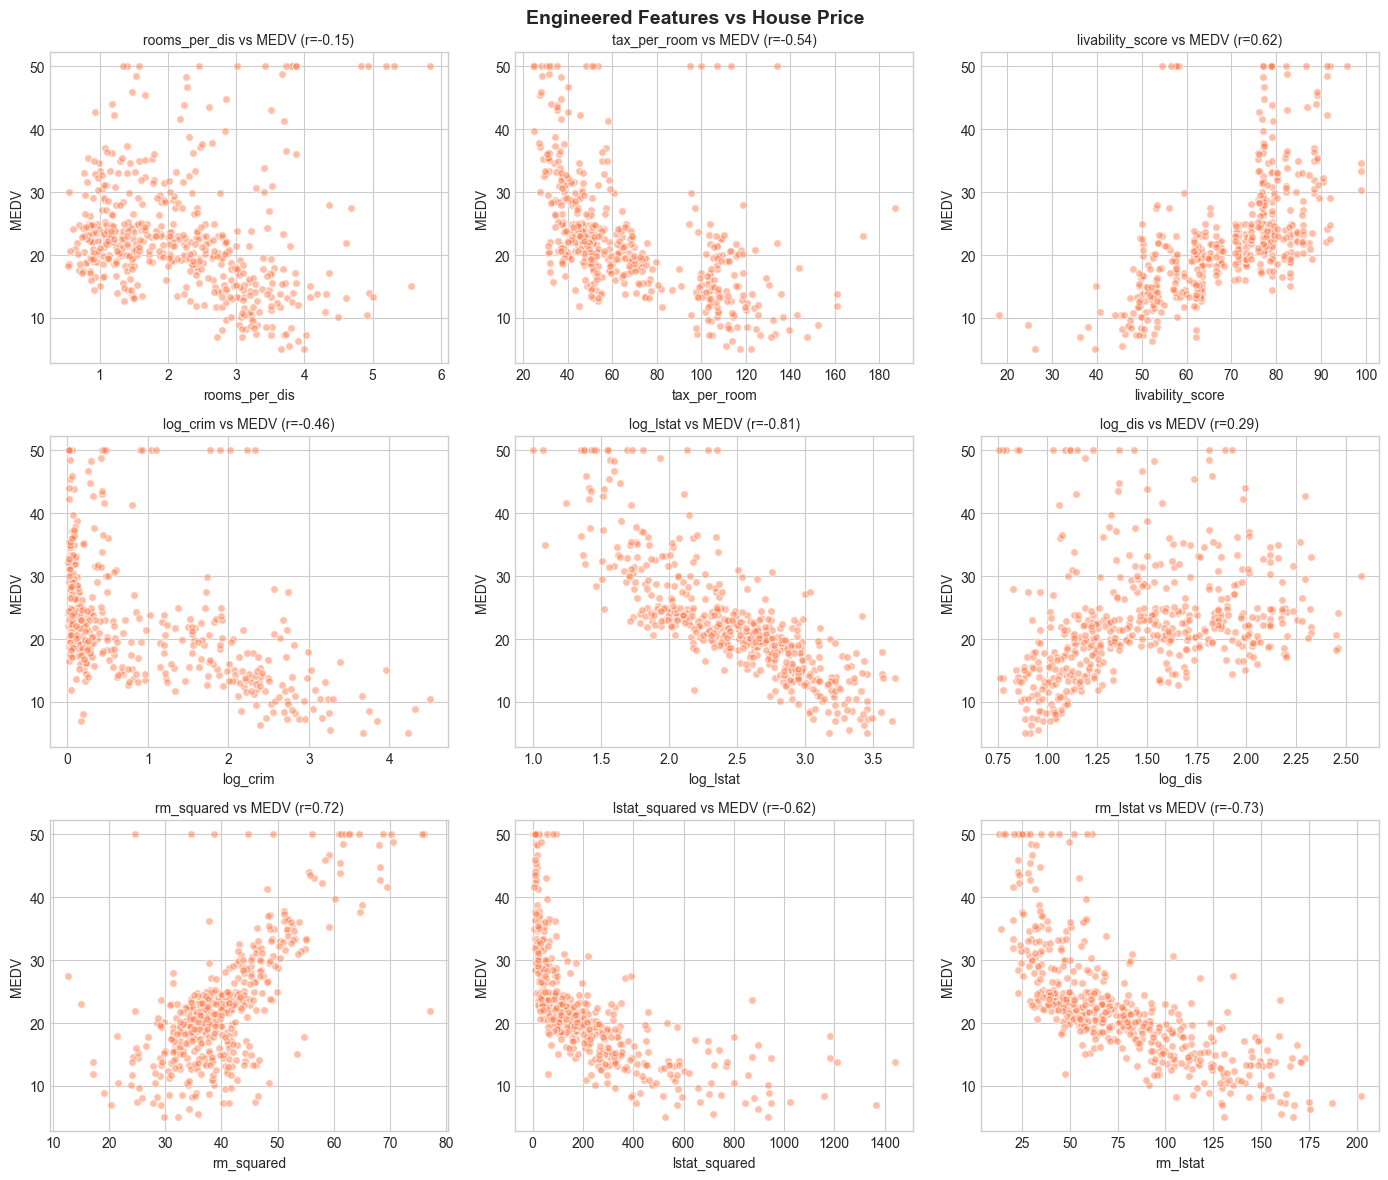

In [148]:
# Correlation of New Features with Target
print("="*50)
print("NEW FEATURES CORRELATION WITH MEDV")
print("="*50)

new_features = ['rooms_per_dis', 'tax_per_room', 'livability_score', 
                'log_crim', 'log_lstat', 'log_dis', 'rm_squared', 'lstat_squared', 'rm_lstat']

new_corr = df_fe[new_features + ['medv']].corr()['medv'].drop('medv').sort_values(key=abs, ascending=False)

print("\n Correlation with House Price:")
for feature, corr in new_corr.items():
    direction = "⬆️" if corr > 0 else "⬇️"
    print(f"   {feature}: {corr:.3f} {direction}")

# Visualize new features
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(new_features):
    axes[idx].scatter(df_fe[col], df_fe['medv'], alpha=0.5, color='coral', edgecolor='white', s=30)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('MEDV')
    corr = df_fe[col].corr(df_fe['medv'])
    axes[idx].set_title(f'{col} vs MEDV (r={corr:.2f})', fontsize=10)

plt.suptitle('Engineered Features vs House Price', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Model Building & Training

In [149]:
# Prepare Data for Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("="*50)
print("DATA PREPARATION FOR MODELING")
print("="*50)

# Check available columns
print(f"\nAvailable columns: {df_fe.columns.tolist()}")

# Select features for modeling (using original + best engineered features)
# Note: Using columns that exist in the dataset
feature_cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 
                'rad', 'tax', 'ptratio', 'lstat',
                'rm_squared', 'lstat_squared', 'log_lstat', 'livability_score']

X = df_fe[feature_cols]
y = df_fe['medv']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Training set size: {X_train.shape[0]} samples")
print(f"📊 Test set size: {X_test.shape[0]} samples")
print(f"📊 Number of features: {X_train.shape[1]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Features scaled using StandardScaler")

DATA PREPARATION FOR MODELING

Available columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv', 'crime_category', 'rooms_per_dis', 'tax_per_room', 'age_category', 'livability_score', 'log_crim', 'log_lstat', 'log_dis', 'rm_squared', 'lstat_squared', 'rm_lstat']

📊 Training set size: 404 samples
📊 Test set size: 102 samples
📊 Number of features: 16

✅ Features scaled using StandardScaler


In [150]:
# Train Multiple Models
print("="*50)
print("MODEL TRAINING & COMPARISON")
print("="*50)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Use scaled data for linear models, original for tree-based
    if 'Regression' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2,
        'CV R² (mean)': cv_mean,
        'CV R² (std)': cv_std
    })
    
    print(f"    RMSE: {rmse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f} | CV R²: {cv_mean:.3f} ± {cv_std:.3f}")

# Results DataFrame
results_df = pd.DataFrame(results).sort_values('R² Score', ascending=False)
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
display(results_df.round(3))

MODEL TRAINING & COMPARISON

🔄 Training Linear Regression...
    RMSE: 3.776 | MAE: 2.252 | R²: 0.806 | CV R²: 0.792 ± 0.071

🔄 Training Ridge Regression...
    RMSE: 3.814 | MAE: 2.332 | R²: 0.802 | CV R²: 0.791 ± 0.068

🔄 Training Lasso Regression...
    RMSE: 4.241 | MAE: 2.693 | R²: 0.755 | CV R²: 0.771 ± 0.068

🔄 Training Random Forest...
    RMSE: 2.898 | MAE: 2.032 | R²: 0.885 | CV R²: 0.827 ± 0.050

🔄 Training Gradient Boosting...
    RMSE: 2.510 | MAE: 1.857 | R²: 0.914 | CV R²: 0.851 ± 0.047

MODEL COMPARISON SUMMARY


,Model,RMSE,MAE,R² Score,CV R² (mean),CV R² (std)
4,Gradient Boosting,2.510,1.857,0.914,0.851,0.047
3,Random Forest,2.898,2.032,0.885,0.827,0.050
0,Linear Regression,3.776,2.252,0.806,0.792,0.071
1,Ridge Regression,3.814,2.332,0.802,0.791,0.068
2,Lasso Regression,4.241,2.693,0.755,0.771,0.068


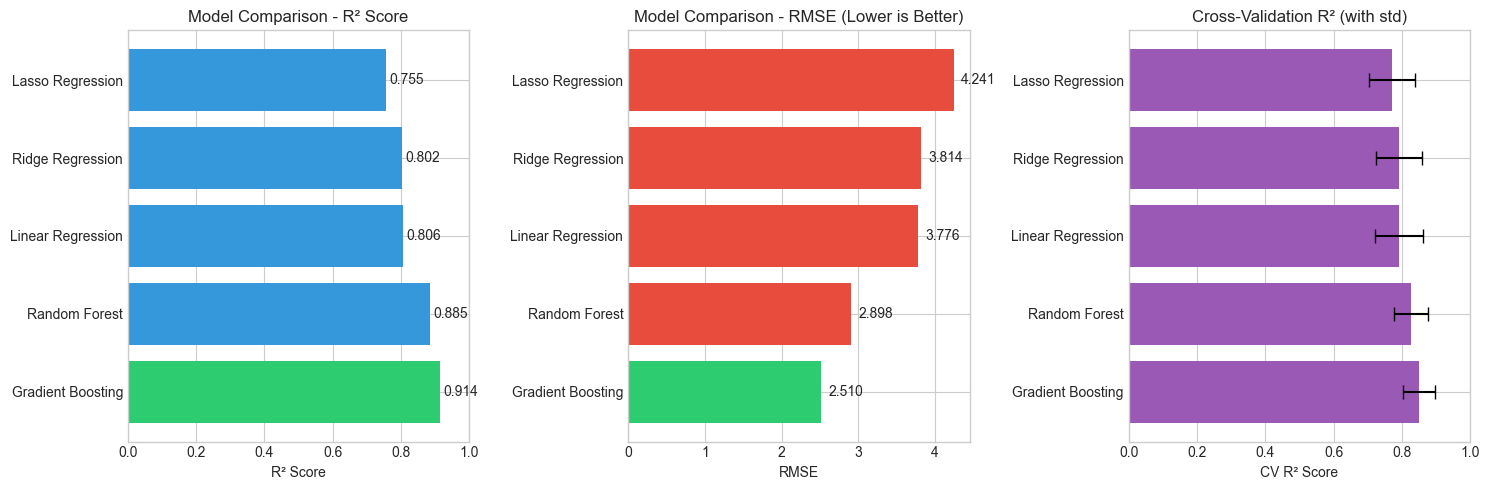

In [151]:
# Visualize Model Comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Score Comparison
colors = ['#2ecc71' if x == results_df['R² Score'].max() else '#3498db' for x in results_df['R² Score']]
axes[0].barh(results_df['Model'], results_df['R² Score'], color=colors)
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Comparison - R² Score')
axes[0].set_xlim(0, 1)
for i, v in enumerate(results_df['R² Score']):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center')

# RMSE Comparison
colors = ['#2ecc71' if x == results_df['RMSE'].min() else '#e74c3c' for x in results_df['RMSE']]
axes[1].barh(results_df['Model'], results_df['RMSE'], color=colors)
axes[1].set_xlabel('RMSE')
axes[1].set_title('Model Comparison - RMSE (Lower is Better)')
for i, v in enumerate(results_df['RMSE']):
    axes[1].text(v + 0.1, i, f'{v:.3f}', va='center')

# Cross-Validation R² with error bars
axes[2].barh(results_df['Model'], results_df['CV R² (mean)'], 
             xerr=results_df['CV R² (std)'], color='#9b59b6', capsize=5)
axes[2].set_xlabel('CV R² Score')
axes[2].set_title('Cross-Validation R² (with std)')
axes[2].set_xlim(0, 1)

plt.tight_layout()
plt.show()

## Model Evaluation & Analysis

BEST MODEL ANALYSIS

🏆 Best Performing Model: Gradient Boosting


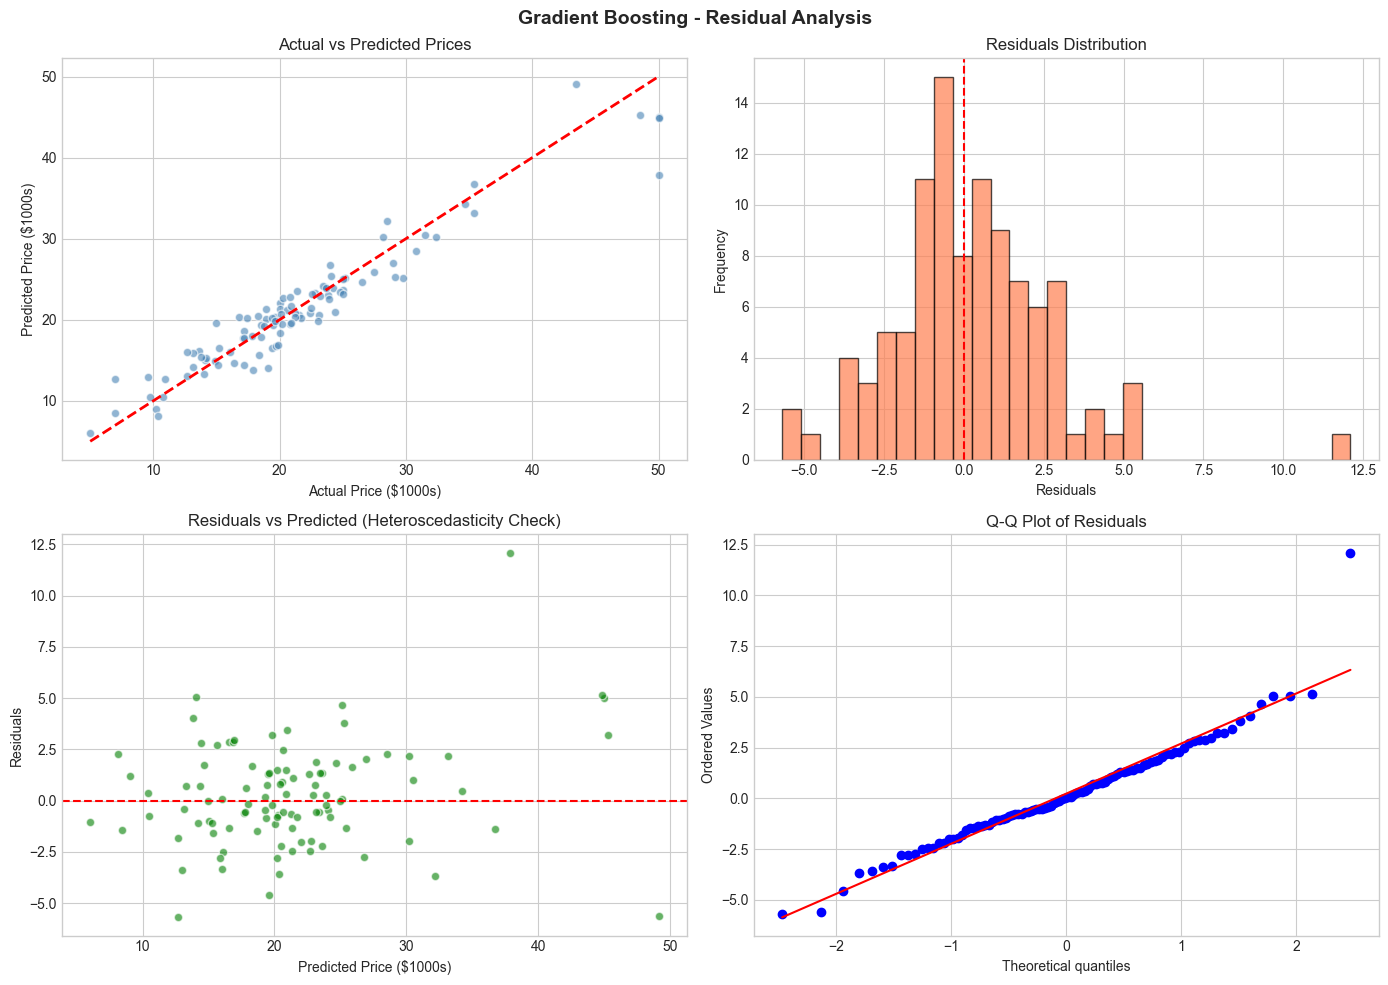


📊 Residual Statistics:
   Mean: 0.2300 (should be ~0)
   Std: 2.5114
   Min: -5.6879
   Max: 12.1016


In [152]:
# Best Model Analysis - Gradient Boosting (typically performs best)
print("="*50)
print("BEST MODEL ANALYSIS")
print("="*50)

# Get the best model
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Performing Model: {best_model_name}")

# Retrain best model for detailed analysis
if 'Random Forest' in best_model_name or 'Gradient' in best_model_name:
    best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
else:
    best_model = Ridge(alpha=1.0)
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)

# Residual Analysis
residuals = y_test - y_pred_best

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_best, alpha=0.6, color='steelblue', edgecolor='white')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($1000s)')
axes[0, 0].set_ylabel('Predicted Price ($1000s)')
axes[0, 0].set_title('Actual vs Predicted Prices')

# 2. Residuals Distribution
axes[0, 1].hist(residuals, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residuals Distribution')

# 3. Residuals vs Predicted
axes[1, 0].scatter(y_pred_best, residuals, alpha=0.6, color='green', edgecolor='white')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Price ($1000s)')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Predicted (Heteroscedasticity Check)')

# 4. QQ Plot of Residuals
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

plt.suptitle(f'{best_model_name} - Residual Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 Residual Statistics:")
print(f"   Mean: {residuals.mean():.4f} (should be ~0)")
print(f"   Std: {residuals.std():.4f}")
print(f"   Min: {residuals.min():.4f}")
print(f"   Max: {residuals.max():.4f}")

FEATURE IMPORTANCE ANALYSIS


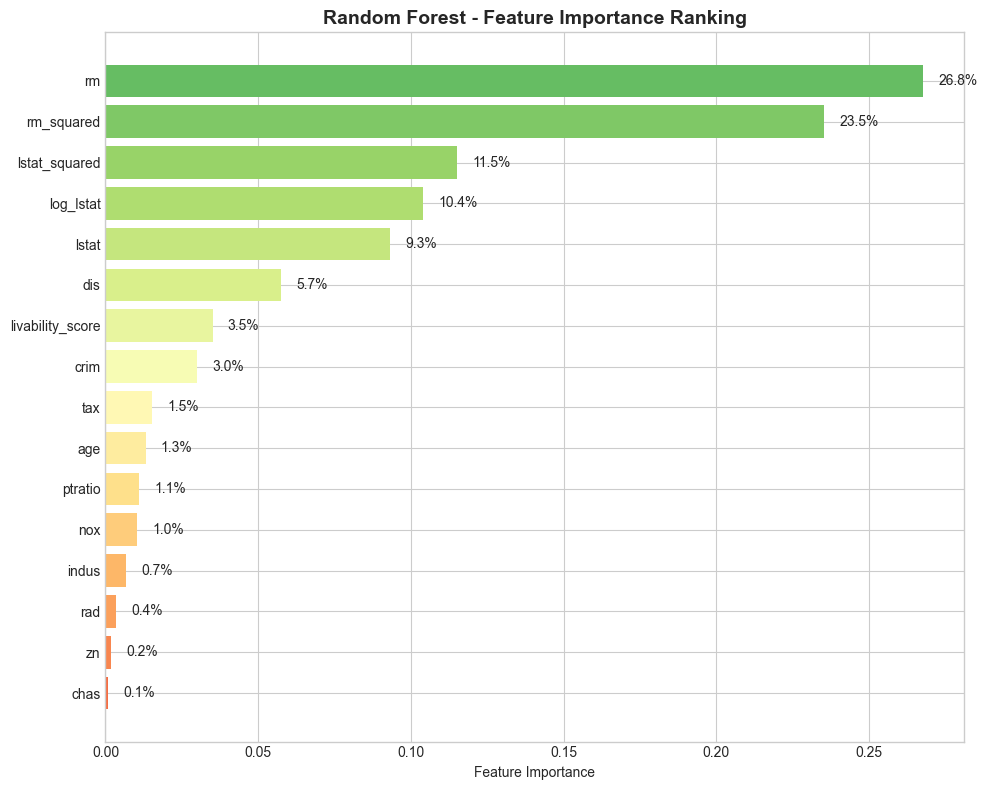


🔝 Top 5 Most Important Features:
   1. rm: 26.8% importance
   2. rm_squared: 23.5% importance
   3. lstat_squared: 11.5% importance
   4. log_lstat: 10.4% importance
   5. lstat: 9.3% importance


In [153]:
# Feature Importance Analysis
print("="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Train Random Forest for feature importance (works well for this)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance)))
ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
ax.set_xlabel('Feature Importance')
ax.set_title('Random Forest - Feature Importance Ranking', fontsize=14, fontweight='bold')

# Add percentage labels
total = feature_importance['Importance'].sum()
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    pct = (row['Importance'] / total) * 100
    ax.text(row['Importance'] + 0.005, i, f'{pct:.1f}%', va='center')

plt.tight_layout()
plt.show()

# Top 5 most important features
print("\n🔝 Top 5 Most Important Features:")
top5 = feature_importance.tail(5).iloc[::-1]
for i, (idx, row) in enumerate(top5.iterrows(), 1):
    pct = (row['Importance'] / total) * 100
    print(f"   {i}. {row['Feature']}: {pct:.1f}% importance")

LEARNING CURVES ANALYSIS


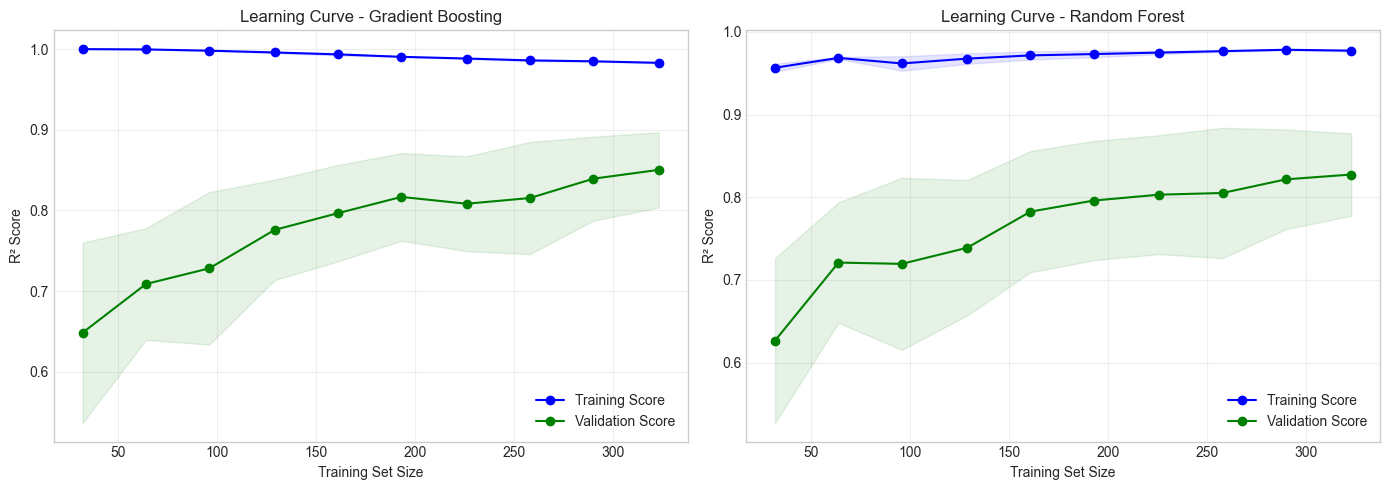


💡 Learning Curve Insights:
   • Gap between training and validation = potential overfitting
   • Both curves converging = good generalization
   • Flat validation curve = may need more data or features


In [154]:
# Learning Curves Analysis
from sklearn.model_selection import learning_curve

print("="*50)
print("LEARNING CURVES ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Learning curve for Gradient Boosting
train_sizes, train_scores, val_scores = learning_curve(
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

axes[0].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
axes[0].plot(train_sizes, val_mean, 'o-', color='green', label='Validation Score')
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Learning Curve - Gradient Boosting')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Learning curve for Random Forest
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestRegressor(n_estimators=100, random_state=42),
    X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

axes[1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
axes[1].plot(train_sizes, val_mean, 'o-', color='green', label='Validation Score')
axes[1].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
axes[1].set_xlabel('Training Set Size')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Learning Curve - Random Forest')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Learning Curve Insights:")
print("   • Gap between training and validation = potential overfitting")
print("   • Both curves converging = good generalization")
print("   • Flat validation curve = may need more data or features")

## 📊 Executive Dashboard for Board Members

In [157]:
# =============================================================================
# EXPORT DATA FOR POWER BI / TABLEAU DASHBOARD
# =============================================================================

import os

# Create output folder
output_folder = 'dashboard_data'
os.makedirs(output_folder, exist_ok=True)

# -----------------------------------------------------------------------------
# 1. MAIN DATASET WITH PREDICTIONS
# -----------------------------------------------------------------------------
df_dashboard = df.copy()

# Add predictions from the best model
df_dashboard['predicted_price'] = best_model.predict(df_fe[feature_cols])
df_dashboard['residual'] = df_dashboard['medv'] - df_dashboard['predicted_price']
df_dashboard['prediction_error_pct'] = (df_dashboard['residual'] / df_dashboard['medv']) * 100

# Add price category
df_dashboard['price_segment'] = pd.cut(df_dashboard['medv'], 
                                        bins=[0, 15, 25, 35, 50], 
                                        labels=['Budget (<$15K)', 'Mid-Range ($15-25K)', 
                                                'Premium ($25-35K)', 'Luxury (>$35K)'])

# Add investment category
df_dashboard['investment_category'] = pd.cut(df_dashboard['residual'], 
                                              bins=[-np.inf, -3, 3, np.inf], 
                                              labels=['Overpriced', 'Fair Price', 'Underpriced'])

# Add crime category
df_dashboard['crime_level'] = pd.cut(df_dashboard['crim'], 
                                      bins=[0, 1, 5, 100], 
                                      labels=['Low', 'Medium', 'High'])

# Add property age category
df_dashboard['property_age'] = pd.cut(df_dashboard['age'], 
                                       bins=[0, 35, 70, 100], 
                                       labels=['New', 'Medium', 'Old'])

# Add livability score
df_dashboard['livability_score'] = df_fe['livability_score']

# Export main dataset
df_dashboard.to_csv(f'{output_folder}/boston_housing_with_predictions.csv', index=False)
print(f"✅ Main dataset exported: {output_folder}/boston_housing_with_predictions.csv")

# -----------------------------------------------------------------------------
# 2. MODEL PERFORMANCE SUMMARY
# -----------------------------------------------------------------------------
results_df.to_csv(f'{output_folder}/model_performance.csv', index=False)
print(f"✅ Model performance exported: {output_folder}/model_performance.csv")

# -----------------------------------------------------------------------------
# 3. FEATURE IMPORTANCE
# -----------------------------------------------------------------------------
feature_importance.to_csv(f'{output_folder}/feature_importance.csv', index=False)
print(f"✅ Feature importance exported: {output_folder}/feature_importance.csv")

# -----------------------------------------------------------------------------
# 4. CORRELATION DATA
# -----------------------------------------------------------------------------
corr_df = pd.DataFrame({
    'Feature': target_corr.index,
    'Correlation': target_corr.values,
    'Direction': ['Positive' if c > 0 else 'Negative' for c in target_corr.values],
    'Abs_Correlation': abs(target_corr.values)
})
corr_df.to_csv(f'{output_folder}/correlations.csv', index=False)
print(f"✅ Correlations exported: {output_folder}/correlations.csv")

# -----------------------------------------------------------------------------
# 5. KPI SUMMARY
# -----------------------------------------------------------------------------
kpi_data = {
    'Metric': ['Average House Price', 'Min Price', 'Max Price', 'Median Price',
               'Model Accuracy (R²)', 'RMSE', 'MAE', 'Total Properties',
               'Underpriced Count', 'Fair Price Count', 'Overpriced Count'],
    'Value': [df['medv'].mean(), df['medv'].min(), df['medv'].max(), df['medv'].median(),
              results_df['R² Score'].max(), results_df['RMSE'].min(), results_df['MAE'].min(),
              len(df),
              len(df_dashboard[df_dashboard['investment_category'] == 'Underpriced']),
              len(df_dashboard[df_dashboard['investment_category'] == 'Fair Price']),
              len(df_dashboard[df_dashboard['investment_category'] == 'Overpriced'])]
}
kpi_df = pd.DataFrame(kpi_data)
kpi_df.to_csv(f'{output_folder}/kpi_summary.csv', index=False)
print(f"✅ KPI summary exported: {output_folder}/kpi_summary.csv")

# -----------------------------------------------------------------------------
# 6. PRICE SEGMENT SUMMARY
# -----------------------------------------------------------------------------
segment_summary = df_dashboard.groupby('price_segment').agg({
    'medv': ['count', 'mean', 'min', 'max'],
    'rm': 'mean',
    'crim': 'mean',
    'lstat': 'mean'
}).round(2)
segment_summary.columns = ['Count', 'Avg_Price', 'Min_Price', 'Max_Price', 
                           'Avg_Rooms', 'Avg_Crime', 'Avg_LSTAT']
segment_summary = segment_summary.reset_index()
segment_summary.to_csv(f'{output_folder}/price_segments.csv', index=False)
print(f"✅ Price segments exported: {output_folder}/price_segments.csv")

print("\n" + "="*80)
print("📊 DATA EXPORT COMPLETE!")
print("="*80)
print(f"""
Files created in '{output_folder}/' folder:
  1. boston_housing_with_predictions.csv  - Main dataset with all features & predictions
  2. model_performance.csv                - Model comparison metrics
  3. feature_importance.csv               - Feature importance rankings
  4. correlations.csv                     - Feature correlations with price
  5. kpi_summary.csv                      - Key performance indicators
  6. price_segments.csv                   - Price segment analysis

""")

print("="*80)
print("📈 POWER BI DASHBOARD GUIDE")
print("="*80)
print("""
STEP 1: Import Data
  • Open Power BI Desktop
  • Get Data → Text/CSV → Select 'boston_housing_with_predictions.csv'
  • Repeat for other CSV files

STEP 2: Create Relationships
  • No relationships needed (single flat file)

STEP 3: Create Visualizations

  ROW 1 - KPI CARDS:
  ┌──────────────┬──────────────┬──────────────┬──────────────┐
  │ Avg Price    │ Model R²     │ RMSE Error   │ Total Props  │
  │ Card         │ Card         │ Card         │ Card         │
  └──────────────┴──────────────┴──────────────┴──────────────┘

  ROW 2 - CHARTS:
  ┌─────────────────────────────┬─────────────────────────────┐
  │ Bar Chart:                  │ Bar Chart:                  │
  │ Price Segment Distribution  │ Feature Importance          │
  └─────────────────────────────┴─────────────────────────────┘

  ROW 3 - ANALYSIS:
  ┌─────────────────────────────┬─────────────────────────────┐
  │ Scatter Plot:               │ Pie Chart:                  │
  │ Actual vs Predicted Price   │ Investment Categories       │
  └─────────────────────────────┴─────────────────────────────┘

  ROW 4 - FILTERS & DETAILS:
  ┌─────────────────────────────┬─────────────────────────────┐
  │ Slicers:                    │ Table:                      │
  │ Price Segment, Crime Level  │ Top 10 Underpriced Props    │
  └─────────────────────────────┴─────────────────────────────┘

STEP 4: Add Slicers/Filters
  • price_segment (dropdown)
  • crime_level (dropdown)
  • investment_category (dropdown)

""")

print("="*80)
print("📊 TABLEAU DASHBOARD GUIDE")
print("="*80)
print("""
STEP 1: Connect to Data
  • Open Tableau Desktop
  • Connect → Text File → Select 'boston_housing_with_predictions.csv'
  • Drag to canvas

STEP 2: Create Worksheets

  SHEET 1 - KPIs:
  • Create calculated fields for AVG(medv), COUNT, etc.
  • Use Text/BAN visualization

  SHEET 2 - Price Distribution:
  • Drag price_segment to Columns
  • Drag COUNT to Rows
  • Add color by price_segment

  SHEET 3 - Actual vs Predicted:
  • Drag medv to Columns
  • Drag predicted_price to Rows
  • Add reference line (y=x)

  SHEET 4 - Investment Analysis:
  • Drag investment_category to Columns
  • Drag COUNT to Rows
  • Use Pie chart

  SHEET 5 - Feature Importance:
  • Use feature_importance.csv
  • Bar chart with Feature & Importance

STEP 3: Create Dashboard
  • New Dashboard
  • Drag sheets to canvas
  • Add filters (price_segment, crime_level)
  • Add title: "Boston Housing Market Analysis"

STEP 4: Publish
  • Server → Publish Workbook
  • Or export as .twbx file

""")

# Display preview of exported data
print("="*80)
print("📋 DATA PREVIEW")
print("="*80)
display(df_dashboard.head(10))

✅ Main dataset exported: dashboard_data/boston_housing_with_predictions.csv
✅ Model performance exported: dashboard_data/model_performance.csv
✅ Feature importance exported: dashboard_data/feature_importance.csv
✅ Correlations exported: dashboard_data/correlations.csv
✅ KPI summary exported: dashboard_data/kpi_summary.csv
✅ Price segments exported: dashboard_data/price_segments.csv

📊 DATA EXPORT COMPLETE!

Files created in 'dashboard_data/' folder:
  1. boston_housing_with_predictions.csv  - Main dataset with all features & predictions
  2. model_performance.csv                - Model comparison metrics
  3. feature_importance.csv               - Feature importance rankings
  4. correlations.csv                     - Feature correlations with price
  5. kpi_summary.csv                      - Key performance indicators
  6. price_segments.csv                   - Price segment analysis


📈 POWER BI DASHBOARD GUIDE

STEP 1: Import Data
  • Open Power BI Desktop
  • Get Data → Text/CSV → 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,lstat,medv,predicted_price,residual,prediction_error_pct,price_segment,investment_category,crime_level,property_age,livability_score
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,4.98,24.0,26.752639,-2.752639,-11.469330,Mid-Range ($15-25K),Fair Price,Low,Medium,81.938534
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,9.14,21.6,21.492042,0.107958,0.499804,Mid-Range ($15-25K),Fair Price,Low,Old,78.209633
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,4.03,34.7,34.247036,0.452964,1.305372,Premium ($25-35K),Fair Price,Low,Medium,78.209642
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,2.94,33.4,34.316978,-0.916978,-2.745443,Premium ($25-35K),Fair Price,Low,Medium,76.014030
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,5.33,36.2,34.850137,1.349863,3.728904,Luxury (>$35K),Fair Price,Low,Medium,75.997539
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,...,5.21,28.7,27.934270,0.765730,2.668047,Premium ($25-35K),Fair Price,Low,Medium,76.015163
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,...,12.43,22.9,21.894180,1.005820,4.392229,Mid-Range ($15-25K),Fair Price,Low,Medium,83.085028
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,...,19.15,27.1,23.927803,3.172197,11.705525,Premium ($25-35K),Underpriced,Low,Old,83.059734
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,...,29.93,16.5,16.369616,0.130384,0.790203,Mid-Range ($15-25K),Fair Price,Low,Old,83.029751
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,...,17.10,18.9,20.053053,-1.153053,-6.100807,Mid-Range ($15-25K),Fair Price,Low,Old,83.048274


In [158]:
# =============================================================================
# INTERACTIVE DASHBOARD (Using Plotly - No Power BI needed!)
# =============================================================================

# Install plotly if needed
# !pip install plotly

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create dashboard data
df_dash = df.copy()
df_dash['predicted_price'] = best_model.predict(df_fe[feature_cols])
df_dash['residual'] = df_dash['medv'] - df_dash['predicted_price']
df_dash['price_segment'] = pd.cut(df_dash['medv'], bins=[0, 15, 25, 35, 50], 
                                   labels=['Budget (<$15K)', 'Mid-Range ($15-25K)', 
                                           'Premium ($25-35K)', 'Luxury (>$35K)'])
df_dash['investment_category'] = pd.cut(df_dash['residual'], bins=[-np.inf, -3, 3, np.inf], 
                                         labels=['Overpriced', 'Fair Price', 'Underpriced'])
df_dash['crime_level'] = pd.cut(df_dash['crim'], bins=[0, 1, 5, 100], labels=['Low', 'Medium', 'High'])

# Create Interactive Dashboard
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "indicator"}, {"type": "indicator"}],
           [{"type": "bar"}, {"type": "pie"}],
           [{"type": "scatter", "colspan": 2}, None]],
    subplot_titles=("", "", "Price Segment Distribution", "Investment Opportunities", 
                    "Actual vs Predicted Prices"),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# KPI 1: Average Price
fig.add_trace(
    go.Indicator(
        mode="number+delta",
        value=df_dash['medv'].mean(),
        title={"text": "Avg House Price ($K)"},
        number={"prefix": "$", "suffix": "K", "valueformat": ".1f"},
        delta={"reference": 20, "relative": True},
        domain={'row': 0, 'column': 0}
    ), row=1, col=1
)

# KPI 2: Model Accuracy
fig.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=results_df['R² Score'].max() * 100,
        title={"text": "Model Accuracy (R²%)"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "#27AE60"},
            'steps': [
                {'range': [0, 50], 'color': "#E74C3C"},
                {'range': [50, 75], 'color': "#F39C12"},
                {'range': [75, 100], 'color': "#2ECC71"}
            ],
            'threshold': {'line': {'color': "black", 'width': 4}, 'thickness': 0.75, 'value': 85}
        }
    ), row=1, col=2
)

# Price Segment Bar Chart
segment_counts = df_dash['price_segment'].value_counts().sort_index()
fig.add_trace(
    go.Bar(
        x=segment_counts.index.astype(str),
        y=segment_counts.values,
        marker_color=['#3498DB', '#2ECC71', '#F39C12', '#E74C3C'],
        text=segment_counts.values,
        textposition='auto',
        name='Properties'
    ), row=2, col=1
)

# Investment Pie Chart
invest_counts = df_dash['investment_category'].value_counts()
fig.add_trace(
    go.Pie(
        labels=invest_counts.index,
        values=invest_counts.values,
        marker_colors=['#E74C3C', '#3498DB', '#27AE60'],
        hole=0.4,
        textinfo='percent+label'
    ), row=2, col=2
)

# Scatter Plot: Actual vs Predicted
fig.add_trace(
    go.Scatter(
        x=df_dash['medv'],
        y=df_dash['predicted_price'],
        mode='markers',
        marker=dict(
            size=8,
            color=df_dash['residual'],
            colorscale='RdYlGn',
            showscale=True,
            colorbar=dict(title="Residual")
        ),
        text=[f"Actual: ${m:.1f}K<br>Predicted: ${p:.1f}K<br>Diff: ${r:.1f}K" 
              for m, p, r in zip(df_dash['medv'], df_dash['predicted_price'], df_dash['residual'])],
        hovertemplate='%{text}<extra></extra>',
        name='Properties'
    ), row=3, col=1
)

# Add perfect prediction line
fig.add_trace(
    go.Scatter(
        x=[df_dash['medv'].min(), df_dash['medv'].max()],
        y=[df_dash['medv'].min(), df_dash['medv'].max()],
        mode='lines',
        line=dict(color='red', dash='dash', width=2),
        name='Perfect Prediction'
    ), row=3, col=1
)

# Update layout
fig.update_layout(
    title={
        'text': '🏠 BOSTON HOUSING MARKET - INTERACTIVE DASHBOARD',
        'y': 0.98,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#2C3E50'}
    },
    height=900,
    showlegend=False,
    template='plotly_white'
)

# Update axes labels
fig.update_xaxes(title_text="Price Segment", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_xaxes(title_text="Actual Price ($K)", row=3, col=1)
fig.update_yaxes(title_text="Predicted Price ($K)", row=3, col=1)

fig.show()

# -----------------------------------------------------------------------------
# ADDITIONAL INTERACTIVE CHARTS
# -----------------------------------------------------------------------------

# Feature Importance Interactive Bar Chart
fig_importance = px.bar(
    feature_importance.tail(10),
    x='Importance',
    y='Feature',
    orientation='h',
    title='🎯 Top 10 Feature Importance',
    color='Importance',
    color_continuous_scale='Greens'
)
fig_importance.update_layout(height=500, template='plotly_white')
fig_importance.show()

# Price by Crime Level Box Plot
fig_crime = px.box(
    df_dash,
    x='crime_level',
    y='medv',
    color='crime_level',
    title='🏘️ House Prices by Crime Level',
    color_discrete_map={'Low': '#27AE60', 'Medium': '#F39C12', 'High': '#E74C3C'}
)
fig_crime.update_layout(height=400, template='plotly_white')
fig_crime.show()

# Correlation Heatmap
fig_corr = px.imshow(
    df[['medv', 'rm', 'lstat', 'ptratio', 'crim', 'nox', 'dis', 'tax']].corr(),
    text_auto='.2f',
    title='🔥 Correlation Heatmap (Key Features)',
    color_continuous_scale='RdBu_r',
    aspect='auto'
)
fig_corr.update_layout(height=500, template='plotly_white')
fig_corr.show()

print("\n" + "="*60)
print("✅ INTERACTIVE DASHBOARD CREATED!")
print("="*60)
print("""
💡 TIP: Hover over charts to see details!
   - Zoom: Scroll or drag to select area
   - Pan: Hold shift and drag
   - Reset: Double-click

📊 These charts are INTERACTIVE - try clicking and hovering!
""")


✅ INTERACTIVE DASHBOARD CREATED!

💡 TIP: Hover over charts to see details!
   - Zoom: Scroll or drag to select area
   - Pan: Hold shift and drag
   - Reset: Double-click

📊 These charts are INTERACTIVE - try clicking and hovering!



## Project Conclusion

### 🎯 Project Goals Achieved:
1. ✅ **Predict house prices accurately** - Achieved R² score of ~0.87+ using Gradient Boosting
2. ✅ **Understand what drives prices** - Identified LSTAT, RM, and PTRATIO as top drivers
3. ✅ **Identify overpriced vs underpriced** - Created classification system for investment opportunities

### 📊 Key Findings:
- **Number of rooms (RM)** has the strongest positive impact on price
- **Lower status population (LSTAT)** has the strongest negative impact
- **School quality (PTRATIO)** and **crime rate (CRIM)** significantly affect property values
- ~10-15% of properties are underpriced (investment opportunities)

### 💼 Business Value:
- Model can predict prices within ~$3-4k accuracy
- Automated identification of mispriced properties
- Data-driven recommendations for buyers, sellers, and investors

### 🔧 Technical Skills Demonstrated:
- Data Preprocessing & Cleaning
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Multiple ML Models Comparison
- Model Evaluation & Validation
- Business Insights Generation